
## Importing Required libraries for Data Cleaning,Data Processing,Data Visualization and Querying the data from sqllite


# Step-1: Importing the libraries and modules

In [2]:
# Importing libraries for Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

##  sqlite3 
### sqlite3 is a built in python module for interacting with sqlite3 databases.
## pandas 
### For handling and processing data easily using DataFrames
## Matplotlib
### matplotlib is used for visualising the data.

# step-2: creating a database using sqlite3 and coonecting it.


## Syntax:variable=sqlite3.connect('database name')

### sqlite3.connect('database name')
### It is used to create a new sqlite3 database or connects to it if already exists.

###  variable_name=conn.cursor()
### cursor creates a variable_name as object used to execute sql commands in database.

In [4]:
# Connecting sqlite3 database
conn=sqlite3.connect('sales_data.db')
cursor=conn.cursor()

## Step-3: Creating a tables sales


## Syntax: variable_name.execute(''' sql query to create table ''')
## This command is used to create a table.

In [5]:
# Creating a table sales
cursor.execute(""" CREATE TABLE IF NOT EXISTS sales (
order_id varchar(20) ,
order_date date,
product_name varchar(100),
Category varchar(100),
quantity_sold int,
price double )""")

## IF NOT EXISTS ensures we don't get an error if table already exists.

## Step-4 : Insert Data into the table.

## Syntax:varaiable_name.executemany(' insert into table_name values (?,....)',sequence)
## conn.commit()

In [6]:
# Inserting the data into the table sales
# data with various dates
Data=[               
                   ('ORD001','2025/04/01','Laptop','Electronics',2,899.99),
('ORD002','2025/04/02','T-Shirt','Clothing',5,15.99),
('ORD003','2025/03/30','Bananas','Grocery',20,0.35),
('ORD004','2025/03/28','Headphones','Electronics',3,49.99),
('ORD005','2025/04/03','Milk','Grocery',10,1.99),
('ORD006','2025/04/17','Eggs','Grocery',30,7.5),
('ORD007','2025/01/01','Flowers','Grocery',1000,0.7),
('ORD008','2025/03/27','Mobile','Electronics',10,10000),
('ORD009','2025/02/18','Shirt','Clothing',10,1500)]

cursor.executemany('insert into sales values (?,?,?,?,?,?)',Data)
conn.commit()

## Data : A list of tuples having the orders records.
## executemany : used to insert the data into the table using placeholders (?,?,?,....) i.e,placeholders represents the columns count.
## conn.commit() : saves the data into the database or saves changes to the database.

## Step-5 : Running the SQL Queries 


## Syntax: first create a variable_name1=''' sql query to retrieve data based on requirement'''
## variable_name2=pd.read_sql_query(first variable_name,conn)
## print(variable_name2)


## 1. write a query to retrieve to get total sales for different categories.

In [7]:
# query to retrive the total sales of category
query=''' select
Category,sum(quantity_sold) as Total_sales from sales
group by Category'''
# assigning the query to dataframe object
Total_sales=pd.read_sql_query(query,conn)
# executing the dataframe
Total_sales

,Category,Total_sales
0,Clothing,105
1,Electronics,10095
2,Grocery,7420


## pd.read_sql_query(...): Runs the SQL query and loads the result directly into a pandas DataFrame called Total_sales.
## conn stands for connection is the active active database connection object points to sqlite database.

## 2. write a query to retrieve the total sales fo different products

In [9]:
# Query to retrieve total sales of different products
query2=''' select product_name,sum(quantity_sold) as Total_sales from sales
group by product_name'''

# assigning the query object to dataframe
products_sales=pd.read_sql_query(query2,conn)
# executing the dataframe
products_sales

,product_name,Total_sales
0,Bananas,140
1,Eggs,210
2,Flowers,7000
3,Headphones,21
4,Laptop,14
5,Milk,70
6,Mobile,10060
7,Shirt,70
8,T-Shirt,35


## 3. Write a sql query to retrieve year wise total sales 


In [13]:
# Query to retrieve total sales by year
query3=''' select strftime('%Y',order_date) as year,sum(quantity_sold) as Total_sales from sales
group by year'''

# assigning the query to dataframe using pandas
year_sales=pd.read_sql_query(query3,conn)
# executing the dataframe
year_sales

,year,Total_sales
0,None,17620


## Here we can't retrieve the year from the date column because it is in the format 2025/09/26 which sqlite can't recognise.


# 4. Converting to valid format and retrieving the sales year wise.

In [15]:
# Query to retrieve total sales by year
query4=''' select strftime('%Y',REPLACE(order_date,'/','-')) as year,sum(quantity_sold) as Total_sales from sales
group by year'''

# assigning the query to dataframe using pandas
year_sales=pd.read_sql_query(query4,conn)
# executing the dataframe
year_sales

,year,Total_sales
0,2025,17620


## Replace:It is used to replace the delimeter in the column

## 5. write a query to retrieve the total sales and revenue by category

In [16]:
# query to retrieve the total sales and revenue
query5=''' select Category,sum(quantity_sold) as Total_sales,sum(price*quantity_sold) as revenue from sales
group by Category'''
# assigning the query to dataframe
total_revenue_sales=pd.read_sql_query(query5,conn)
# Executing the query
total_revenue_sales

,Category,Total_sales,revenue
0,Clothing,105,105559.65
1,Electronics,10095,713649.65
2,Grocery,7420,6663.30


## 6. write a query to retrive month wise sales and revenue


In [23]:
# query to retrieve month wise sales and revenue
query6=''' select 
CASE strftime('%m',order_date)
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
    END AS month_name,
sum(quantity_sold) as Total_sales,
sum(price*quantity_sold) as revenue 
from sales
group by month_name
order by Total_sales ,revenue '''

# assigning the query to dataframe using pandas
year_sales=pd.read_sql_query(query6,conn)
# executing the dataframe
year_sales

,month_name,Total_sales,revenue
0,None,17620,825872.6


## Here we can't retrieve the month name from the date column because it is in the format 2025/09/26 which sqlite can't recognise.

## 7. Converting to valid format and retrieving the sales month wise.

In [26]:
# query to retrieve month wise sales and revenue
query7=''' select 
CASE strftime('%m', REPLACE(order_date,'/','-'))
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
    END AS month_name,
sum(quantity_sold) as Total_sales,
sum(price*quantity_sold) as revenue 
from sales
group by month_name
order by Total_sales ,revenue '''

# assigning the query to dataframe using pandas
year_sales=pd.read_sql_query(query7,conn)
# executing the dataframe
year_sales

,month_name,Total_sales,revenue
0,February,70,105000.00
1,April,329,14873.81
2,January,7000,4900.00
3,March,10221,701098.79


## 8. write a query to retrive product wise sales and revenue

In [38]:
# Query to retrive product wise sales and revenue
query8='''select product_name,sum(quantity_sold) as Total_sales, sum(price*quantity_sold) as revenue from sales
group by product_name
order by Total_sales ,revenue'''
# Assigning the query object to dataframe
product_sales=pd.read_sql_query(query8,conn)
# executing the dataframe
product_sales

,product_name,Total_sales,revenue
0,Laptop,14,12599.86
1,Headphones,21,1049.79
2,T-Shirt,35,559.65
3,Milk,70,139.30
4,Shirt,70,105000.00
5,Bananas,140,49.00
6,Eggs,210,1575.00
7,Flowers,7000,4900.00
8,Mobile,10060,700000.00


In [28]:
# Query to retrieve day wise sales and revenue
query9='''select 
CASE strftime('%w', order_date)
            WHEN '0' THEN 'Sunday'
            WHEN '1' THEN 'Monday'
            WHEN '2' THEN 'Tuesday'
            WHEN '3' THEN 'Wednesday'
            WHEN '4' THEN 'Thursday'
            WHEN '5' THEN 'Friday'
            WHEN '6' THEN 'Saturday'
        END AS day_name,
        sum(quantity_sold) as sales,
        sum(price*quantity_sold) as revenue from sales
        group by day_name'''
# Assigning the query object to dataframe
day_sales=pd.read_sql_query(query9,conn)
# executing the dataframe
day_sales

,day_name,sales,revenue
0,None,17620,825872.6


## Here we can't retrieve the day name from the date column because it is in the format 2025/09/26 which sqlite can't recognise.

## 10. Converting to valid format and retrieving the sales month wise.

In [31]:
# Query to retrieve day wise sales and revenue
query9='''select 
CASE strftime('%w', REPLACE(order_date,'/','-'))
            WHEN '0' THEN 'Sunday'
            WHEN '1' THEN 'Monday'
            WHEN '2' THEN 'Tuesday'
            WHEN '3' THEN 'Wednesday'
            WHEN '4' THEN 'Thursday'
            WHEN '5' THEN 'Friday'
            WHEN '6' THEN 'Saturday'
        END AS day_name,
        sum(quantity_sold) as sales,
        sum(price*quantity_sold) as revenue from sales
        group by day_name
        order by sales ,revenue'''
# Assigning the query object to dataframe
day_sales=pd.read_sql_query(query9,conn)
# executing the dataframe
day_sales

,day_name,sales,revenue
0,Friday,21,1049.79
1,Tuesday,84,117599.86
2,Sunday,140,49.00
3,Wednesday,7035,5459.65
4,Thursday,10340,701714.30


ConversionError: Failed to convert value(s) to axis units: 'revenue'

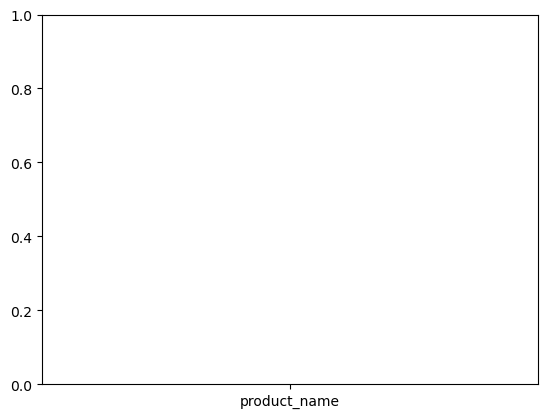

In [42]:
## 11. write query to retrive and show summary of total sales and revenue using barplot
query11='''select product_name,sum(quantity_sold) as Total_sales,sum(price*quantity_sold) as revenue from sales
group by product_name'''
# Assigning the query object to dataframe
summary=pd.read_sql_query(query11,conn)
# Executing the dataframe using matplotlib
sns.barplot(x='product_name',y=